In [1072]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [1073]:
htrain = train.copy()
htest = test.copy()

In [1074]:
ntrain = htrain.shape[0]
ntest = htest.shape[0]
y_train1 = htrain.SalePrice.values
all_data = pd.concat((htrain, htest)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print('all_data size is : {}'.format(all_data.shape))
all_data.head()

all_data size is : (2919, 80)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


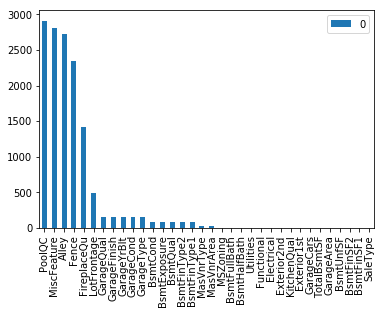

In [1075]:
#looking at missing values in data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0].plot(kind='bar')

In [1076]:
#substitute PoolQC where Pool area >0 with values after looking at the other values

all_data.loc[2420, 'PoolQC'] = 'Fa'
all_data.loc[2503,'PoolQC'] = 'Gd'
all_data.loc[2599,'PoolQC'] = 'Fa'

In [1077]:
#fill categorical variables that have Na as 'None' category
col_missings = ["Alley", "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1", 
"BsmtFinType2", "FireplaceQu", "GarageType","GarageFinish","GarageQual",
"GarageCond", "PoolQC", "Fence","MiscFeature"]
all_data[col_missings] = all_data[col_missings].fillna(value = "None")
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,None,0,2,CollgCr,61,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,None,0,5,Veenker,0,8,6,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,None,0,9,CollgCr,42,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,None,0,2,Crawfor,35,5,7,Y,0,None,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,None,0,12,NoRidge,84,5,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


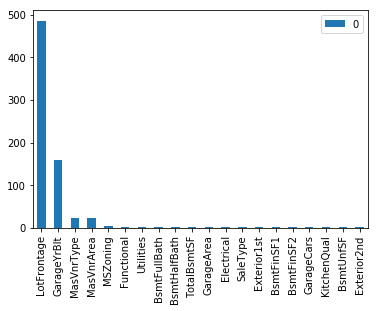

In [1078]:
#looking at missing values in data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0].plot(kind='bar')

In [1079]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [1080]:
##imputing KNN 
#from fancyimpute  import KNN
#all_data[['LotFrontage','MasVnrArea']] = pd.DataFrame(KNN(k=30).complete(all_data[['LotFrontage','MasVnrArea']])).as_matrix()
#imputing MasVnrType with mode of train
#all_data['MasVnrType'] = all_data['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

In [1081]:
#fill in missing value for GarageYr
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)
all_data.shape

(2919, 80)

Total Missing Data: 23
Missing number of rows: 13


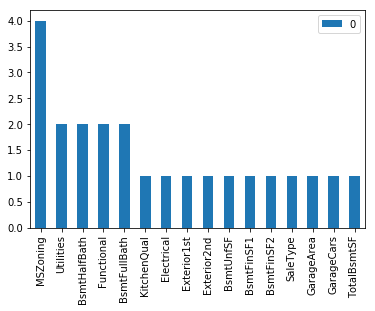

In [1082]:
#looking at missing values in data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
print("Total Missing Data: {}".format(sum(missing[missing[0]!=0][0])))

plot_data=all_data[pd.isnull(all_data).any(axis=1)]
print("Missing number of rows: {}".format(plot_data.shape[0]))
missing[missing[0]!=0].plot(kind='bar')


In [1083]:
#plot_data.replace(to_replace = ( plot_data.isnull()== False), value = 0, inplace = True)
#plot_data.fillna(1)
#plot_data
##sns.heatmap(plot_data, mask=mask)

In [1084]:
#imputing MSZoning with mode of train
all_data['MSZoning'] = all_data['MSZoning'].fillna(train['MSZoning'].mode()[0])

In [1085]:
plot_data.isnull().sum(axis=1)

1379    1
1555    1
1915    2
1945    1
2120    6
2151    2
2188    2
2216    2
2250    1
2473    1
2489    1
2576    2
2904    1
dtype: int64

In [1086]:
#all_data.drop(all_data.index[[2120]], inplace=True)

Total Missing Data: 19
Missing number of rows: 11


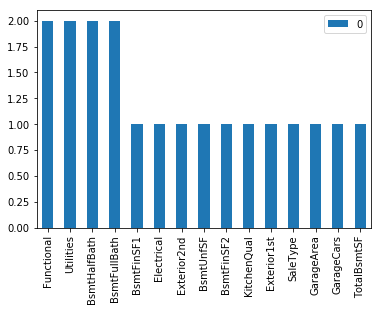

In [1087]:
#looking at missing values in data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
print("Total Missing Data: {}".format(sum(missing[missing[0]!=0][0])))

plot_data=all_data[pd.isnull(all_data).any(axis=1)]
print("Missing number of rows: {}".format(plot_data.shape[0]))
missing[missing[0]!=0].plot(kind='bar')

In [1088]:
all_data["Functional"].fillna('Typ', inplace=True)

In [1089]:
all_data["GarageCars"].fillna(train["GarageCars"].mean(), inplace=True)
all_data["GarageArea"].fillna(train["GarageArea"].mean(), inplace=True)

In [1090]:
all_data['Utilities'].fillna(train['Utilities'].mode()[0], inplace = True)
all_data['Electrical'].fillna(train['Electrical'].mode()[0], inplace = True)
all_data['KitchenQual'].fillna(train['KitchenQual'].mode()[0], inplace = True)
all_data['Exterior1st'].fillna(train['Exterior1st'].mode()[0], inplace = True)
all_data['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0], inplace = True)
all_data['SaleType'].fillna(train['SaleType'].mode()[0], inplace = True)
all_data['BsmtHalfBath'].fillna(0, inplace = True)
all_data['BsmtFullBath'].fillna(0, inplace = True)

In [1091]:
#looking at missing values in data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
print("Total Missing Data: {}".format(sum(missing[missing[0]!=0][0])))

Total Missing Data: 4


Total Missing Data: 4
Missing number of rows: 1


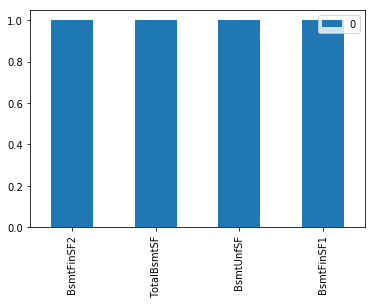

In [1092]:
#looking at missing values in data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
print("Total Missing Data: {}".format(sum(missing[missing[0]!=0][0])))

plot_data=all_data[pd.isnull(all_data).any(axis=1)]
print("Missing number of rows: {}".format(plot_data.shape[0]))
missing[missing[0]!=0].plot(kind='bar')

In [1093]:
clean_data=all_data.copy()

In [1094]:
#convert categorical ordinal columns
col_ordinal = clean_data[['ExterQual', 'ExterCond', 'BsmtQual',"BsmtCond",
           "BsmtExposure", "HeatingQC",
          "KitchenQual", "FireplaceQu", "GarageType","GarageQual",
          "GarageCond","PoolQC"]]

ord_dic1 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1,'None':0}
for col in col_ordinal:
    clean_data[col] = clean_data[col].map(lambda x: ord_dic1.get(x, 0))

#fix LotShape
ord_dic2 = {'Reg': 4, 'IR1': 3, 'IR2':2, 'IR3':1}
clean_data.LotShape = clean_data.LotShape.map(lambda x: ord_dic2.get(x, 0))

#fix BsmntExposure
ord_dic3 = {"Gd":4 ,'Av':3, 'Mn':2, 'No':1, 'None':0}
clean_data.BsmtExposure = clean_data.BsmtExposure.map(lambda x: ord_dic3.get(x, 0))

#fix GarageFinish
ord_dic4 = {'Fin':3,'RFn':2,'Unf':1,'None':0}
clean_data.GarageFinish = clean_data.GarageFinish.map(lambda x: ord_dic4.get(x, 0))

#fix Paved
ord_dic5 ={'Y':3,'P':2,"N":1}
clean_data.PavedDrive = clean_data.PavedDrive.map(lambda x: ord_dic5.get(x, 0))


#fix Electrical
ord_dic6={'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1}
clean_data.Electrical = clean_data.Electrical.map(lambda x: ord_dic6.get(x, 0))

#fix BsmntFinType1
ord_dic7 = {"GLQ": 6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "None":0}
clean_data.BsmtFinType1 = clean_data.BsmtFinType1.map(lambda x: ord_dic7.get(x, 0))

#fix Fence
ord_dic8={'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0}
clean_data.Fence = clean_data.Fence.map(lambda x: ord_dic8.get(x, 0))

#fix Functional
ord_dic9={"Typ":8 ,"Min1":7 , "Min2": 6, "Mod": 5, "Maj1":4 , "Maj2": 3, "Sev": 2, "Sal":1 }
clean_data.Functional = clean_data.Functional.map(lambda x: ord_dic9.get(x, 0))

In [1095]:
clean_data.shape

(2919, 80)

## Interactions

In [1096]:
all_data.loc[all_data['GarageYrBlt']>0, 'GarageYrBlt']=all_data['GarageYrBlt']-all_data['YearBuilt']

In [1097]:
clean_data.loc[clean_data['YearRemodAdd']>0, 'YearRemodAdd']=clean_data['YearRemodAdd']-clean_data['YearBuilt']

In [1098]:
print(len(clean_data.loc[:, clean_data.dtypes == object].columns.values))
print(len(clean_data.loc[:, clean_data.dtypes != object].columns.values))


24
56


In [1099]:
#col_num = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","LowQualFinSF"]
#for col in col_num:
#       clean_data[col]=clean_data[col].astype(str)

In [1100]:
print(len(clean_data.loc[:, clean_data.dtypes == object].columns.values))
print(len(clean_data.loc[:, clean_data.dtypes != object].columns.values))


24
56


In [1101]:
numeric_feats = clean_data.dtypes[clean_data.dtypes != "object"].index

# Check the skew of all numerical features
col_skewed= clean_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :col_skewed})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
PoolQC,16.686213
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.145323
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [1102]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    clean_data[feat] = boxcox1p(clean_data[feat], lam)

There are 56 skewed numerical features to Box Cox transform


In [1103]:
#col_num = clean_data.select_dtypes(exclude=["object"])
#skewness = col_num.apply(lambda x: skew(x))
#skewness_features = skewness[abs(skewness) >= 1].index
#clean_data[skewness_features] = np.log1p(clean_data[skewness_features])

In [1104]:
clean_data = pd.get_dummies(clean_data, drop_first = True)
clean_data.shape

(2919, 201)

In [1105]:
#add all Basement's SF to get new SF and match with existing  TotalBsmtSF

x=[]
clean_data['TotalBsmtSF_new'] = clean_data['BsmtFinSF1'] + clean_data['BsmtFinSF2'] + clean_data['BsmtUnfSF']
x=(clean_data['TotalBsmtSF_new'] != clean_data['TotalBsmtSF'])

x[x==True]

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
9       True
10      True
11      True
12      True
14      True
16      True
18      True
19      True
23      True
24      True
26      True
27      True
28      True
33      True
34      True
37      True
38      True
40      True
41      True
42      True
43      True
44      True
        ... 
2860    True
2862    True
2869    True
2873    True
2875    True
2876    True
2878    True
2879    True
2881    True
2882    True
2885    True
2886    True
2887    True
2895    True
2896    True
2899    True
2900    True
2901    True
2902    True
2903    True
2905    True
2907    True
2908    True
2909    True
2910    True
2911    True
2912    True
2915    True
2917    True
2918    True
Length: 1907, dtype: bool

In [1106]:
clean_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,Electrical,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,Id,KitchenAbvGr,KitchenQual,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa,TotalBsmtSF_new
0,11.692623,11.686189,0.0,1.540963,1.540963,0.0,11.170327,0.0,2.259674,0.730463,0.000000,1.820334,7.483296,2.055642,0.000000,1.540963,1.820334,0.0,0.000000,0.000000,1.194318,2.602594,10.506271,1.194318,1.540963,1.194318,1.540963,0.0,14.187527,13.698888,0.730463,2.055642,0.730463,0.730463,1.820334,19.212182,5.831328,1.820334,0.0,5.684507,8.059126,0.0,1.194318,5.714669,2.055642,2.440268,1.540963,0.0,0.0,0.0,2.602594,11.692623,0.000000,14.187527,0.000000,14.195323,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,18.653622
1,12.792276,0.000000,0.0,1.540963,1.540963,0.0,12.062832,0.0,2.055642,0.000000,0.730463,1.82033

In [1107]:
#as only one differs that too in test, we delete the redundant basement columns and new column
clean_data.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF_new'], axis=1, inplace=True)


In [1108]:
#get total square footage of house
clean_data['TotalSF'] = all_data['TotalBsmtSF'] + clean_data['1stFlrSF'] + clean_data['2ndFlrSF']
clean_data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1, inplace=True)
clean_data.head()

,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFullBath,BsmtHalfBath,BsmtQual,Electrical,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,Id,KitchenAbvGr,KitchenQual,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,ScreenPorch,TotRmsAbvGrd,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa,TotalSF
0,0.0,1.540963,1.540963,0.0,2.259674,0.730463,0.000000,1.820334,2.055642,0.000000,1.540963,1.820334,0.0,0.000000,0.000000,1.194318,2.602594,10.506271,1.194318,1.540963,1.194318,1.540963,0.0,14.187527,13.698888,0.730463,2.055642,0.730463,0.730463,1.820334,19.212182,5.831328,1.820334,0.0,5.684507,8.059126,0.0,1.194318,5.714669,2.055642,2.440268,1.540963,0.0,0.0,0.0,2.602594,0.000000,14.187527,0.000000,14.195323,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,879.378812
1,0.0,1.540963,1.540963,0.0,2.055642,0.000000,0.730463,1.820334,2.055642,0.000000,1.540963,1.540963,0.0,1.540963,0.730463,1.194318,2.602594,10.062098,1.194318,1.540963,1.194318,1.540963,0.0,14.145138,12.792276,0.00000

Total Missing Data: 1
Missing number of rows: 1


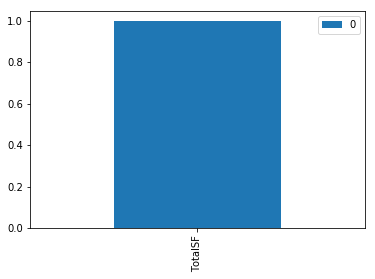

In [1109]:
#looking at missing values in data 
missing = pd.DataFrame(clean_data.isnull().sum().sort_values(ascending=False))
print("Total Missing Data: {}".format(sum(missing[missing[0]!=0][0])))

plot_data=clean_data[pd.isnull(clean_data).any(axis=1)]
print("Missing number of rows: {}".format(plot_data.shape[0]))
missing[missing[0]!=0].plot(kind='bar')

In [1110]:
#imputing KNN 
from fancyimpute  import KNN
clean_data[['TotalSF']] = pd.DataFrame(KNN(k=30).complete(clean_data[['TotalSF']])).as_matrix()

Imputing row 1/2919 with 0 missing, elapsed time: 1.335
Imputing row 101/2919 with 0 missing, elapsed time: 1.335
Imputing row 201/2919 with 0 missing, elapsed time: 1.336
Imputing row 301/2919 with 0 missing, elapsed time: 1.336
Imputing row 401/2919 with 0 missing, elapsed time: 1.337
Imputing row 501/2919 with 0 missing, elapsed time: 1.337
Imputing row 601/2919 with 0 missing, elapsed time: 1.337
Imputing row 701/2919 with 0 missing, elapsed time: 1.338
Imputing row 801/2919 with 0 missing, elapsed time: 1.338
Imputing row 901/2919 with 0 missing, elapsed time: 1.338
Imputing row 1001/2919 with 0 missing, elapsed time: 1.338
Imputing row 1101/2919 with 0 missing, elapsed time: 1.339
Imputing row 1201/2919 with 0 missing, elapsed time: 1.339
Imputing row 1301/2919 with 0 missing, elapsed time: 1.340
Imputing row 1401/2919 with 0 missing, elapsed time: 1.340
Imputing row 1501/2919 with 0 missing, elapsed time: 1.340
Imputing row 1601/2919 with 0 missing, elapsed time: 1.340
Imputing 

In [1111]:
#looking at missing values in data 
missing = pd.DataFrame(clean_data.isnull().sum().sort_values(ascending=False))
print("Total Missing Data: {}".format(sum(missing[missing[0]!=0][0])))


Total Missing Data: 0


In [1112]:
clean_data.loc[clean_data['GarageYrBlt']==2207,'GarageYrBlt']=2007

In [1113]:
new_train = clean_data[:ntrain].copy()
new_test = clean_data[ntrain:].copy()

In [1114]:
new_train.to_csv('new_train.csv')

## Outliers

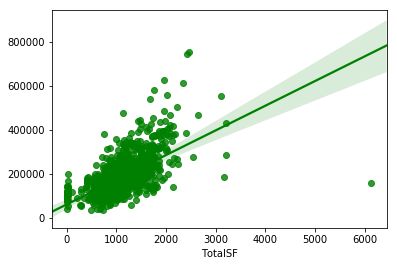

In [1115]:
#look at TotalSquareFt against Price
figsize=(22,60)
sns.regplot(x = new_train.TotalSF, y = y_train1, color='green' )


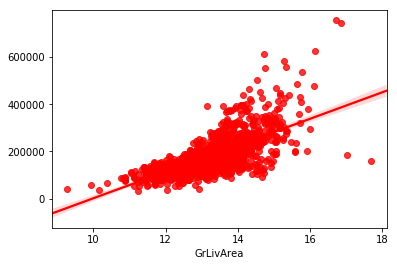

In [1116]:
#look at GrLivArea against Price

sns.regplot(x = new_train['GrLivArea'], y = y_train1, color = 'red')


In [1117]:
y_train1 =pd.DataFrame(y_train1)
y_train1.columns = ["SalePrice"]

new_train = new_train.merge(y_train1, how = "inner", right_index = True, left_index = True)
new_train.head()


,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFullBath,BsmtHalfBath,BsmtQual,Electrical,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,Id,KitchenAbvGr,KitchenQual,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,ScreenPorch,TotRmsAbvGrd,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa,TotalSF,SalePrice
0,0.0,1.540963,1.540963,0.0,2.259674,0.730463,0.000000,1.820334,2.055642,0.000000,1.540963,1.820334,0.0,0.000000,0.000000,1.194318,2.602594,10.506271,1.194318,1.540963,1.194318,1.540963,0.0,14.187527,13.698888,0.730463,2.055642,0.730463,0.730463,1.820334,19.212182,5.831328,1.820334,0.0,5.684507,8.059126,0.0,1.194318,5.714669,2.055642,2.440268,1.540963,0.0,0.0,0.0,2.602594,0.000000,14.187527,0.000000,14.195323,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,879.378812,208500
1,0.0,1.540963,1.540963,0.0,2.055642,0.000000,0.730463,1.820334,2.055642,0.000000,1.540963,1.540963,0.0,1.540963,0.730463,1.194318,2.602594,10.062098,1.194318,1.540963,1.194318,1.540963,0.0,14.145138,

In [1118]:
#Deleting outliers in both above variables
new_train=new_train[new_train['TotalSF']<7800] 
new_train = new_train[new_train['GrLivArea']<4500]

In [1119]:
y_train1 = new_train['SalePrice']
new_train.drop('SalePrice', axis = 1, inplace = True)

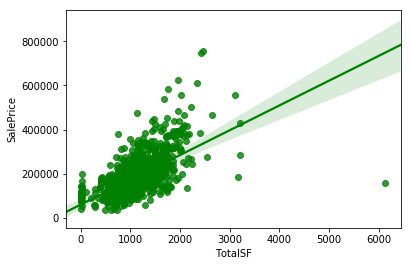

In [1120]:
sns.regplot(x = new_train.TotalSF, y = y_train1, color='green' )

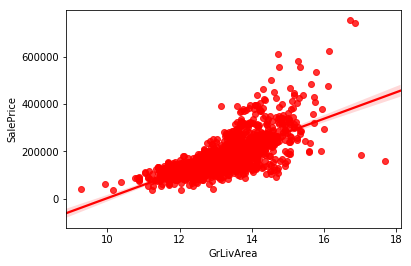

In [1121]:
sns.regplot(x = new_train['GrLivArea'], y = y_train1, color = 'red')

In [1122]:
clean_data = clean_data.drop(["Street_Pave","Utilities_NoSeWa", "RoofMatl_CompShg","RoofMatl_Membran","RoofMatl_Metal","RoofMatl_Roll","RoofMatl_Tar&Grv","RoofMatl_WdShake","RoofMatl_WdShngl", "PoolQC", "MiscVal"],axis=1)

## Transformation

## Models

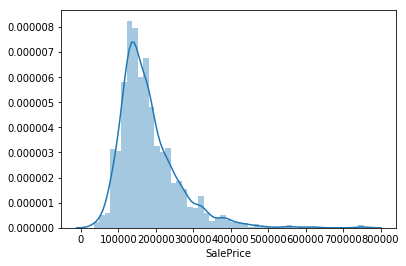

In [1123]:
sns.distplot(y_train1);
#histogram of sale prices shows that we need to normalize SalePricd

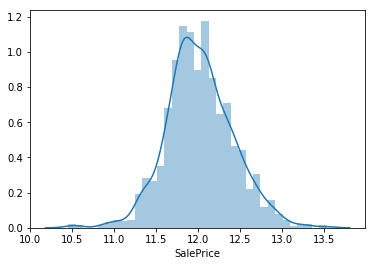

In [1124]:
Y_train=np.log1p(y_train1)
sns.distplot(Y_train)


In [1125]:
new_train.drop('Id',axis=1,inplace=True)

In [1126]:
#Linear Models
from sklearn.linear_model import Lasso, ElasticNet


#Kernel Ridge Regression
from sklearn.kernel_ridge import KernelRidge


#Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingRegressor

#Random Forest
from sklearn.ensemble import RandomForestRegressor

#Support Vector Machines
from sklearn import svm

#Linear Regression
from sklearn import linear_model

#Make Pipeline
from sklearn.pipeline import make_pipeline

#Robust Scaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(
                                    new_train, Y_train, random_state=42, test_size=.33)


In [1127]:

lr = linear_model.LinearRegression()

In [1128]:
model_lr = lr.fit(X_train, y_train)

In [1129]:
print("R^2 for train set: %f" %model_lr.score(X_train, y_train))


R^2 for train set: 0.941246


In [1130]:
predictions = model_lr.predict(X_test)

In [1131]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE is: 
 0.157259416722


In [1132]:
#Lasso
# The error metric: RMSE on the log of the sale prices.
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [1133]:
def my_cross_validate(alphas, Model):
    min_rmse = float('inf')
    best_alpha = None
    for alpha in alphas:
        model = Model(alpha, max_iter=50000).fit(X_train, y_train)
        model_rmse = rmse(model.predict(X_test), y_test)
        if model_rmse < min_rmse:
            best_alpha = alpha
            min_rmse = model_rmse

    print('best_alpha = ', best_alpha, 'min_rmse = ', min_rmse)

alphas = np.logspace(-2,1e2,100)
my_cross_validate(alphas, Lasso)

best_alpha =  0.01 min_rmse =  0.167607302528


In [1134]:
def my_cross_validate(alphas, Model, model_name):
    min_rmse = float('inf')
    best_alpha = None
    for alpha in alphas:
        model = Model(alpha, max_iter=50000).fit(X_train, y_train)
        model_rmse = rmse(model.predict(X_test), y_test)
        if model_rmse < min_rmse:
            best_alpha = alpha
            min_rmse = model_rmse

    print(model_name, 'best_alpha = ', best_alpha, 'min_rmse = ', min_rmse)

alphas = np.logspace(-2,1e2,100)
my_cross_validate(alphas, Lasso, 'Lasso')
my_cross_validate(alphas, ElasticNet, 'ElasticNet')

Lasso best_alpha =  0.01 min_rmse =  0.167607302528
ElasticNet best_alpha =  0.01 min_rmse =  0.153882527722


In [1135]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(new_train.values)
    rmse= np.sqrt(-cross_val_score(model, new_train.values, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [1136]:
alphas = np.logspace(-3,100,100)
best_alpha = None
min_rmse = float('inf')
for alpha in alphas:
    lasso = Lasso(alpha =alpha, random_state=1, max_iter=50000)
    score = rmsle_cv(lasso)
    score_min = score.mean()
    if min_rmse > score_min :
        min_rmse = score_min
        #std = score.std()
        best_alpha = alpha

print('best_alpha = ', best_alpha, 'min_rmse = ', min_rmse)

best_alpha =  0.001 min_rmse =  0.131246398013


In [1137]:

grid_para_ls = [
    {
        'alpha': np.logspace(-3,100,100)
    }
]

las = Lasso()
grid_search_ls = GridSearchCV(las, grid_para_ls, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
grid_search_ls.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'alpha': array([  1.00000e-003,   1.09750e-002, ...,   9.11163e+098,   1.00000e+100])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [1138]:
grid_search_ls.best_params_

{'alpha': 0.001}

In [1139]:
lasso=make_pipeline(RobustScaler(),Lasso(alpha = 0.001, random_state=1))

In [1140]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1300 (0.0252)



In [1141]:
#ElasticNet
alphas = np.logspace(-3,100,100)
best_alpha = None
min_rmse = float('inf')
for alpha in alphas:
    ENet = ElasticNet(alpha = alpha, random_state=1, max_iter=50000)
    score = rmsle_cv(ENet)
    score_min = score.mean()
    if min_rmse > score_min :
        min_rmse = score_min
        #std = score.std()
        best_alpha = alpha

print('best_alpha = ', best_alpha, 'min_rmse = ', min_rmse)

best_alpha =  0.001 min_rmse =  0.130822692601


In [763]:
grid_para_enet = [
    {
        'alpha': np.logspace(-3,1,100),
        'l1_ratio' : np.arange(0,1,0.01)
    }
]

enet = ElasticNet()
grid_search_enet = GridSearchCV(enet, grid_para_enet, scoring = 'neg_mean_squared_error', cv = 3, n_jobs = -1)
grid_search_enet.fit(X_train, y_train)

/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sheetaldarekar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'alpha': array([  1.00000e-03,   1.09750e-03, ...,   9.11163e+00,   1.00000e+01]), 'l1_ratio': array([ 0.  ,  0.01, ...,  0.98,  0.99])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [764]:
grid_search_enet.best_params_

{'alpha': 0.0093260334688321997, 'l1_ratio': 0.01}

In [924]:
ENet = make_pipeline(RobustScaler(),ElasticNet( alpha=0.00923, l1_ratio=.01, random_state=3))


In [925]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1141 (0.0127)



In [926]:
#create the submission file
submission_enet = pd.DataFrame()
submission_enet['Id'] = new_test.Id
submission_lasso = pd.DataFrame()
submission_lasso['Id'] = new_test.Id
new_test.drop('Id',axis=1,inplace=True)

In [927]:
ENet.fit(new_train, Y_train)
lasso.fit(new_train, Y_train)
predict_enet=ENet.predict(new_test)
predict_lasso=ENet.predict(new_test)

In [928]:
final_predict_enet = np.exp(predict_enet)
final_predict_lasso = np.exp(predict_enet)
print ("Original predictions are: \n", predict_enet[:5], "\n")
print ("Final predictions are: \n", final_predict_enet[:5])
submission_enet['SalePrice'] = final_predict_enet
submission_lasso['SalePrice'] = final_predict_lasso

Original predictions are: 
 [ 11.6311209   11.9286709   12.06398113  12.18846553  12.18646538] 

Final predictions are: 
 [ 112546.40405358  151550.00268504  173508.37214278  196509.39703488
  196116.74116845]


In [848]:
submission_enet.to_csv("SheetalSubmission_enet.csv", index=False)
submission_lasso.to_csv("SheetalSubmission_lasso.csv", index=False)

In [1149]:
# Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.005,
                               max_depth=20, max_features='sqrt',
                               min_samples_leaf=15, min_samples_split=10, 
                               loss='huber', random_state =5)

score = rmsle_cv(GBoost)
print('[model] ', "Gradient Boosting score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))

[model]  Gradient Boosting score(cv): 0.1243 (0.0206)


In [ ]:
grid_para_gbm = [
    {
        'n_estimators': np.arange(1,3000,500),
        'max_depth': [5, 10, 15, 20],
        'min_samples_split' : [10, 15, 20, 30, 40, 50]      
    }
]

gbm = GradientBoostingRegressor()
grid_search_gbm = GridSearchCV(gbm, grid_para_gbm, scoring = 'neg_mean_squared_error', cv = 3, n_jobs = -1)
grid_search_gbm.fit(X_train, y_train)

In [1046]:
# aggressive random forst model
rfr = RandomForestRegressor(random_state=0, 
    n_estimators=1000, max_depth=9,  max_features='auto')
score = rmsle_cv(rfr)
print('[model] ', "Random Forest: {:.4f} ({:.4f})".format(score.mean(), score.std()))

[model]  Random Forest: 0.1438 (0.0189)


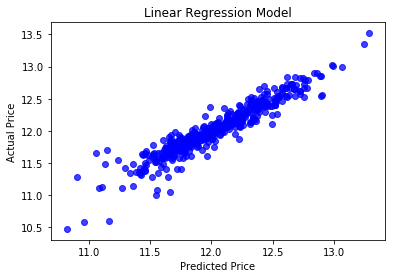

In [719]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

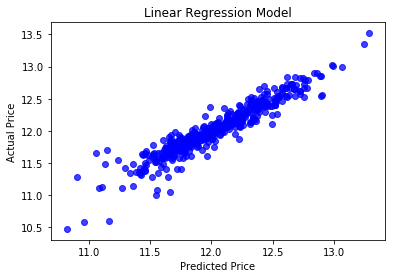

In [720]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [30]:
#near zero
all_data = all_data.drop(["Street","3SsnPorch","Id", "Utilities","Condition2", "RoofMatl", "PoolQC","LowQualFinSF", "PoolArea", "MiscVal"],axis=1)

In [25]:
#ntrain = htrain.shape[0]
#ntest = htest.shape[0]
#y_train = htrain.SalePrice.values
new_train = all_dummy[:ntrain]
new_test = all_dummy[:ntest]
y_train =pd.DataFrame(y_train)
y_train.columns = ["SalePrice"]

new_train = new_train.merge(y_train, how = "inner", right_index = True, left_index = True)


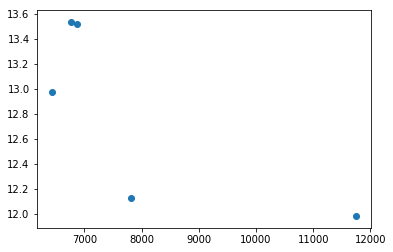

5


In [31]:
from scipy import stats
#examinig outliers by computing abs value of zscore and more than 4 sd from mean w/ TotalSq
z_score = np.abs(stats.zscore(new_train[["totalsq", "SalePrice"]]))
outliers = total_price[z_score >  4]
outliers = outliers.drop_duplicates()
plt.scatter(x=outliers.totalsq, y = outliers.SalePrice)
plt.show()
print(len(outliers))
#there are outliers and they are from homes above 4000 sq ft and below 2000 sqft.?

In [32]:
#dataset with the outliers removed
out_train = new_train[(z_score < 4).all(axis=1)]
out_train = out_train.drop_duplicates()
out_train.shape

(1455, 181)

In [215]:

#Electrical Check if imputed was available when house was built
#Add up all the SFs to get total SFs?
#Add up all the bathrooms?
